In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import cufflinks as cf 

In [45]:
# Original Data from https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data
#OriginalData = pd.read_csv('Book1.csv')
#od = pd.DataFrame(OriginalData)
#od.head()

In [4]:
#  Ajusted data - shorter column names, False and True values changed to 0 and 1, etc.
data = pd.read_csv('ThoracicSurgery.csv') 
df = pd.DataFrame(data)
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [5]:
# Data separated to two groups:
lived = df[df['Death_1yr'] == 0]
died = df[df['Death_1yr'] == 1]

print('Number of patients:')
print('lived ', len(lived))
print('died', len(died))
print('')
print('Total', len(died) + len(lived))

Number of patients:
lived  385
died 69

Total 454


In [6]:
# Comparison of the average values
symp = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',
        'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']

l = [np.mean(lived[c]) for c in symp]
d = [np.mean(died[c]) for c in symp]

print('')
print('Means of symptoms table')
ld = pd.DataFrame(data={'': symp, 'Lived': l, 'Died': d})
ld = ld.set_index('')
ld


Means of symptoms table


,Lived,Died
,,
FVC,3.304597,3.195072
FEV1,2.540805,2.383188
Performance,0.774026,0.913043
Pain,0.051948,0.101449
Haemoptysis,0.124675,0.202899
Dyspnoea,0.044156,0.115942
Cough,0.677922,0.797101
Weakness,0.158442,0.246377
Tumor_Size,1.683117,2.014493


In [7]:
d = np.array(d)
l = np.array(l)
diff = pd.DataFrame(data={'': symp, 'Differences': l-d})
diff = diff.set_index('')
    
diff

,Differences
,
FVC,0.109525
FEV1,0.157617
Performance,-0.139018
Pain,-0.049501
Haemoptysis,-0.078223
Dyspnoea,-0.071786
Cough,-0.119179
Weakness,-0.087935
Tumor_Size,-0.331376


Text(0.5, 1.0, 'Diagnosis')

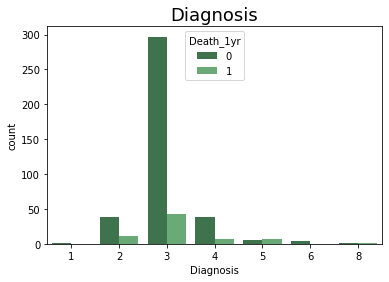

In [8]:
sns.countplot(x='Diagnosis', hue='Death_1yr', data=df, palette='Greens_d').set_title('Diagnosis', fontsize=18)


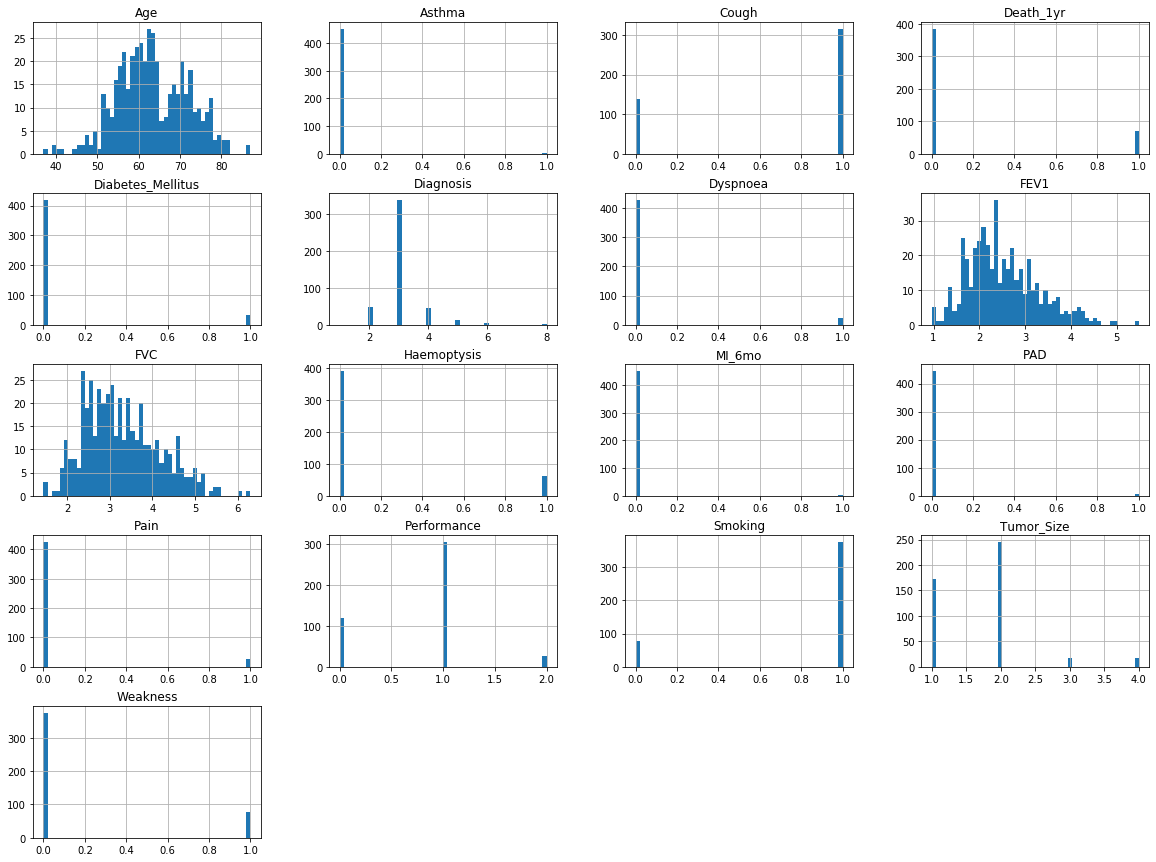

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

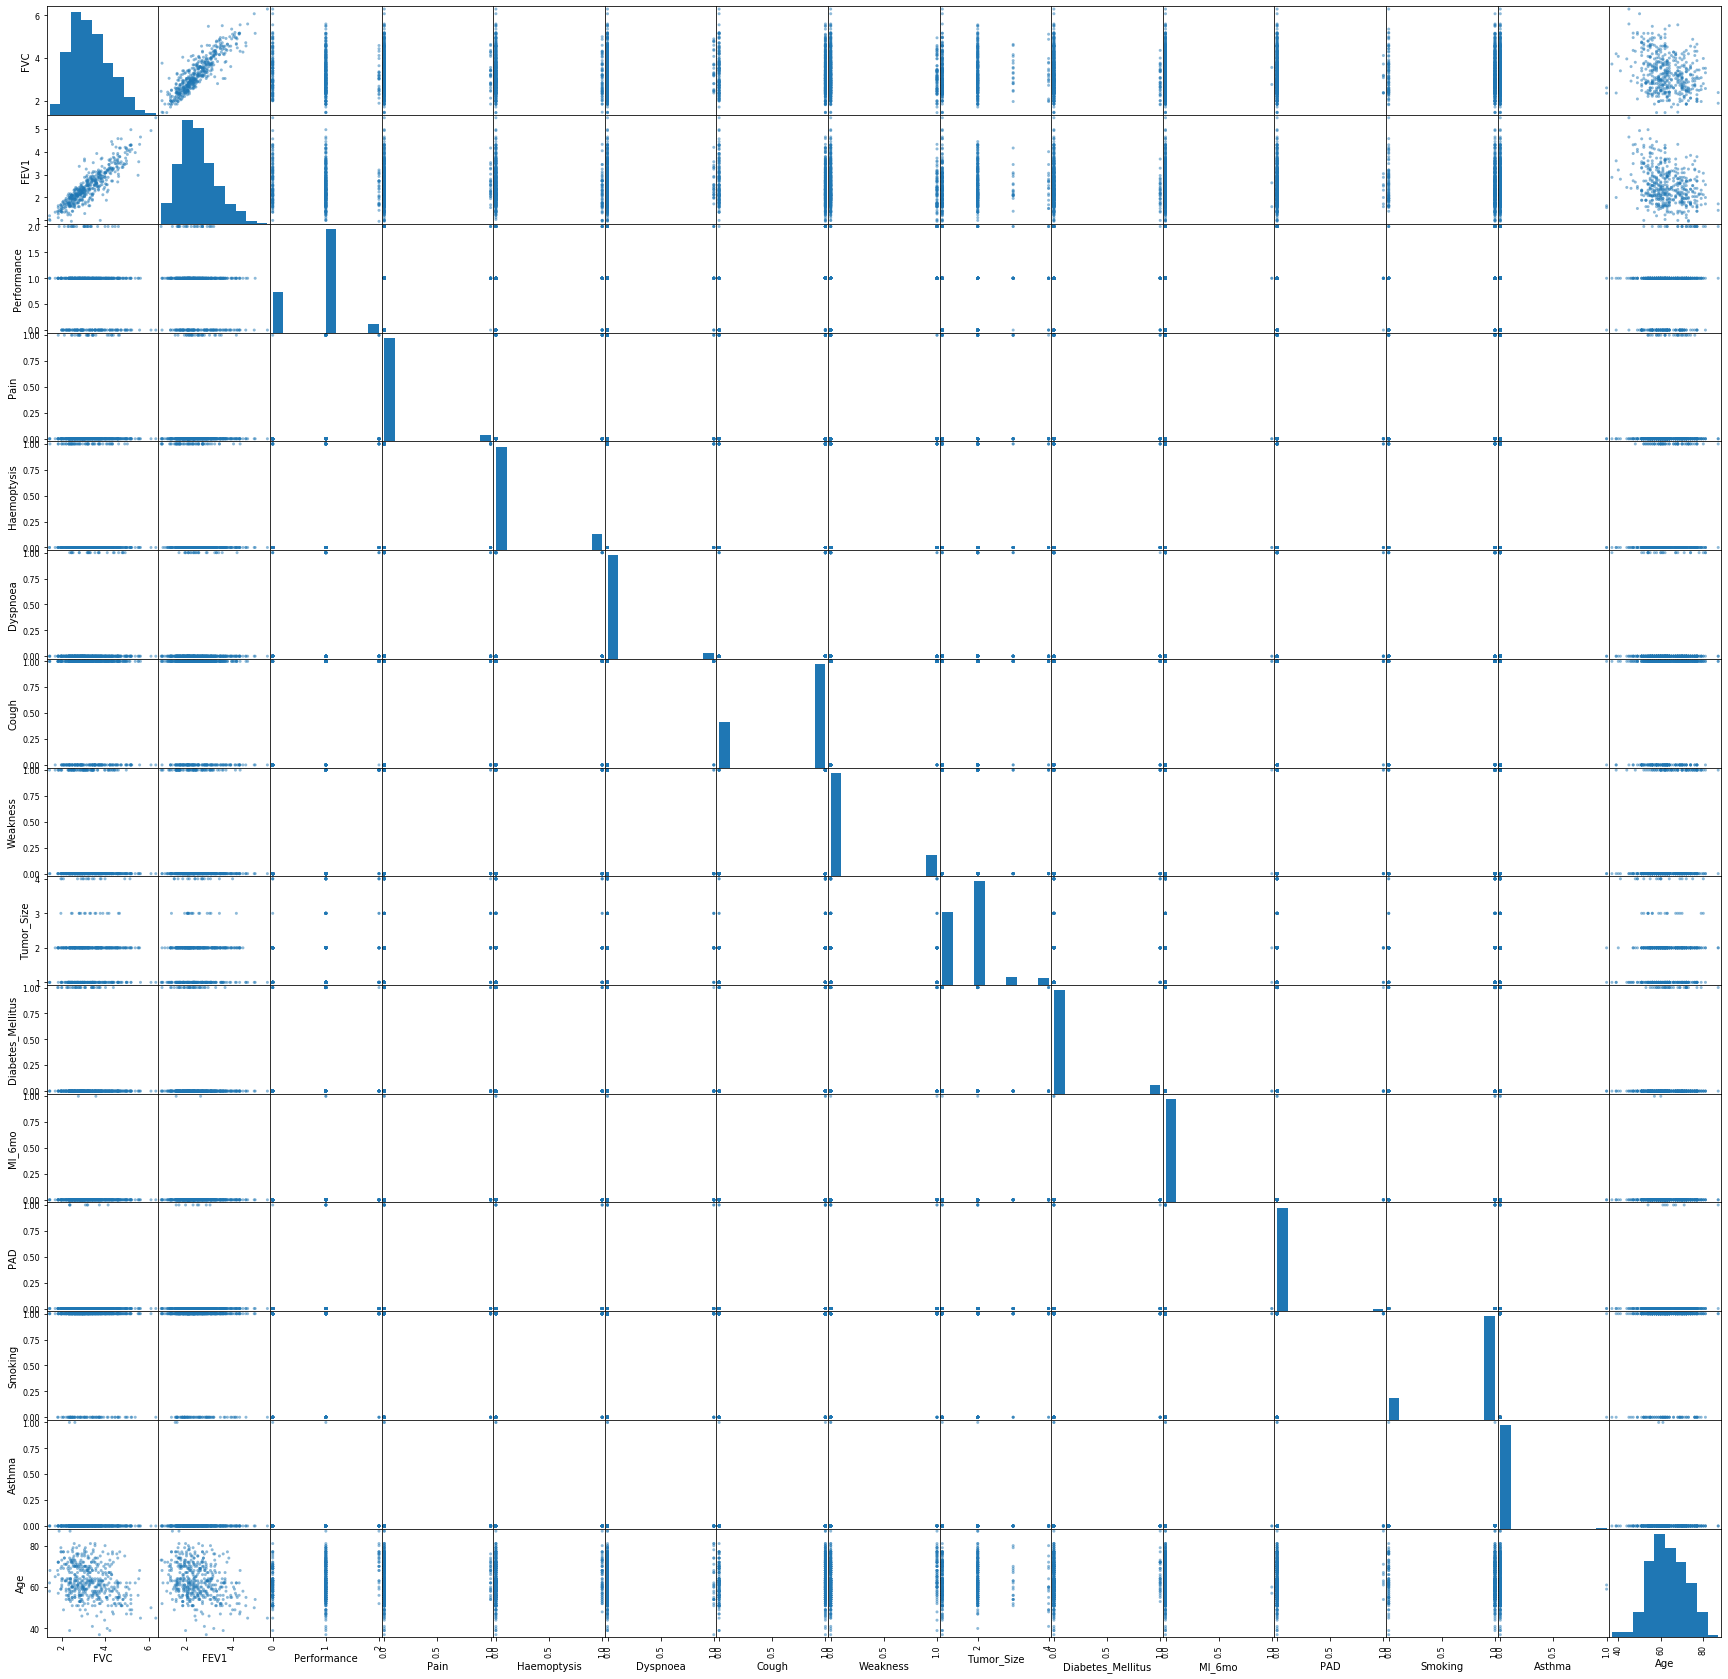

In [10]:
# Correlation matrix of all features
scatter_matrix(data[['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']],
               figsize=(30, 30))
plt.show()

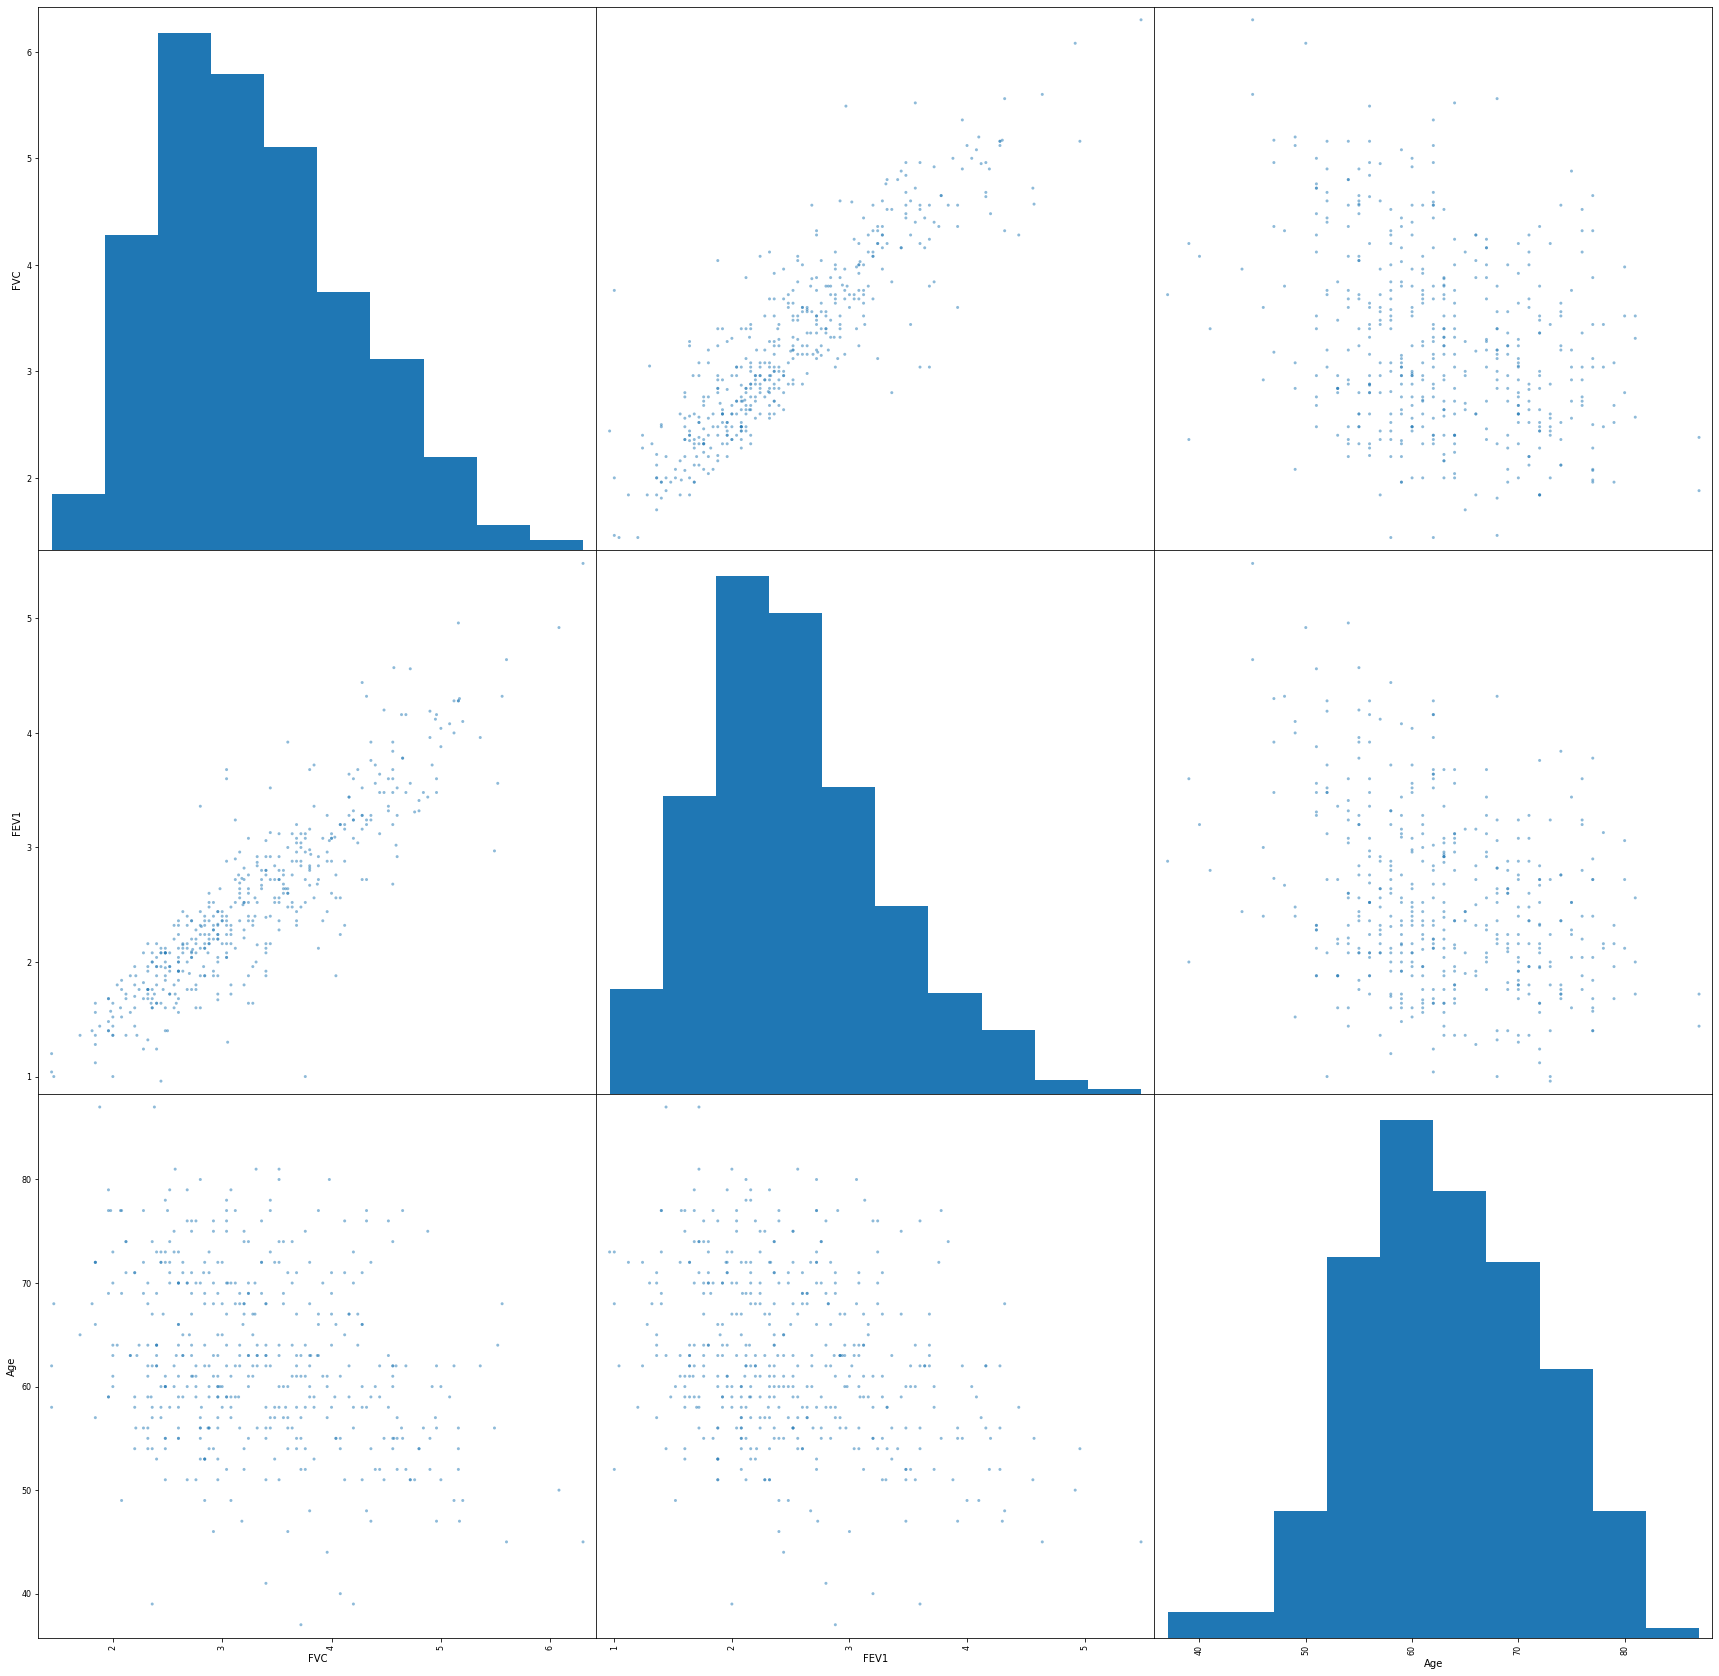

In [11]:
# Correlation matrix of Age, FVC and FEV1
scatter_matrix(data[['FVC', 'FEV1', 'Age']],
               figsize=(30, 30))
plt.show()


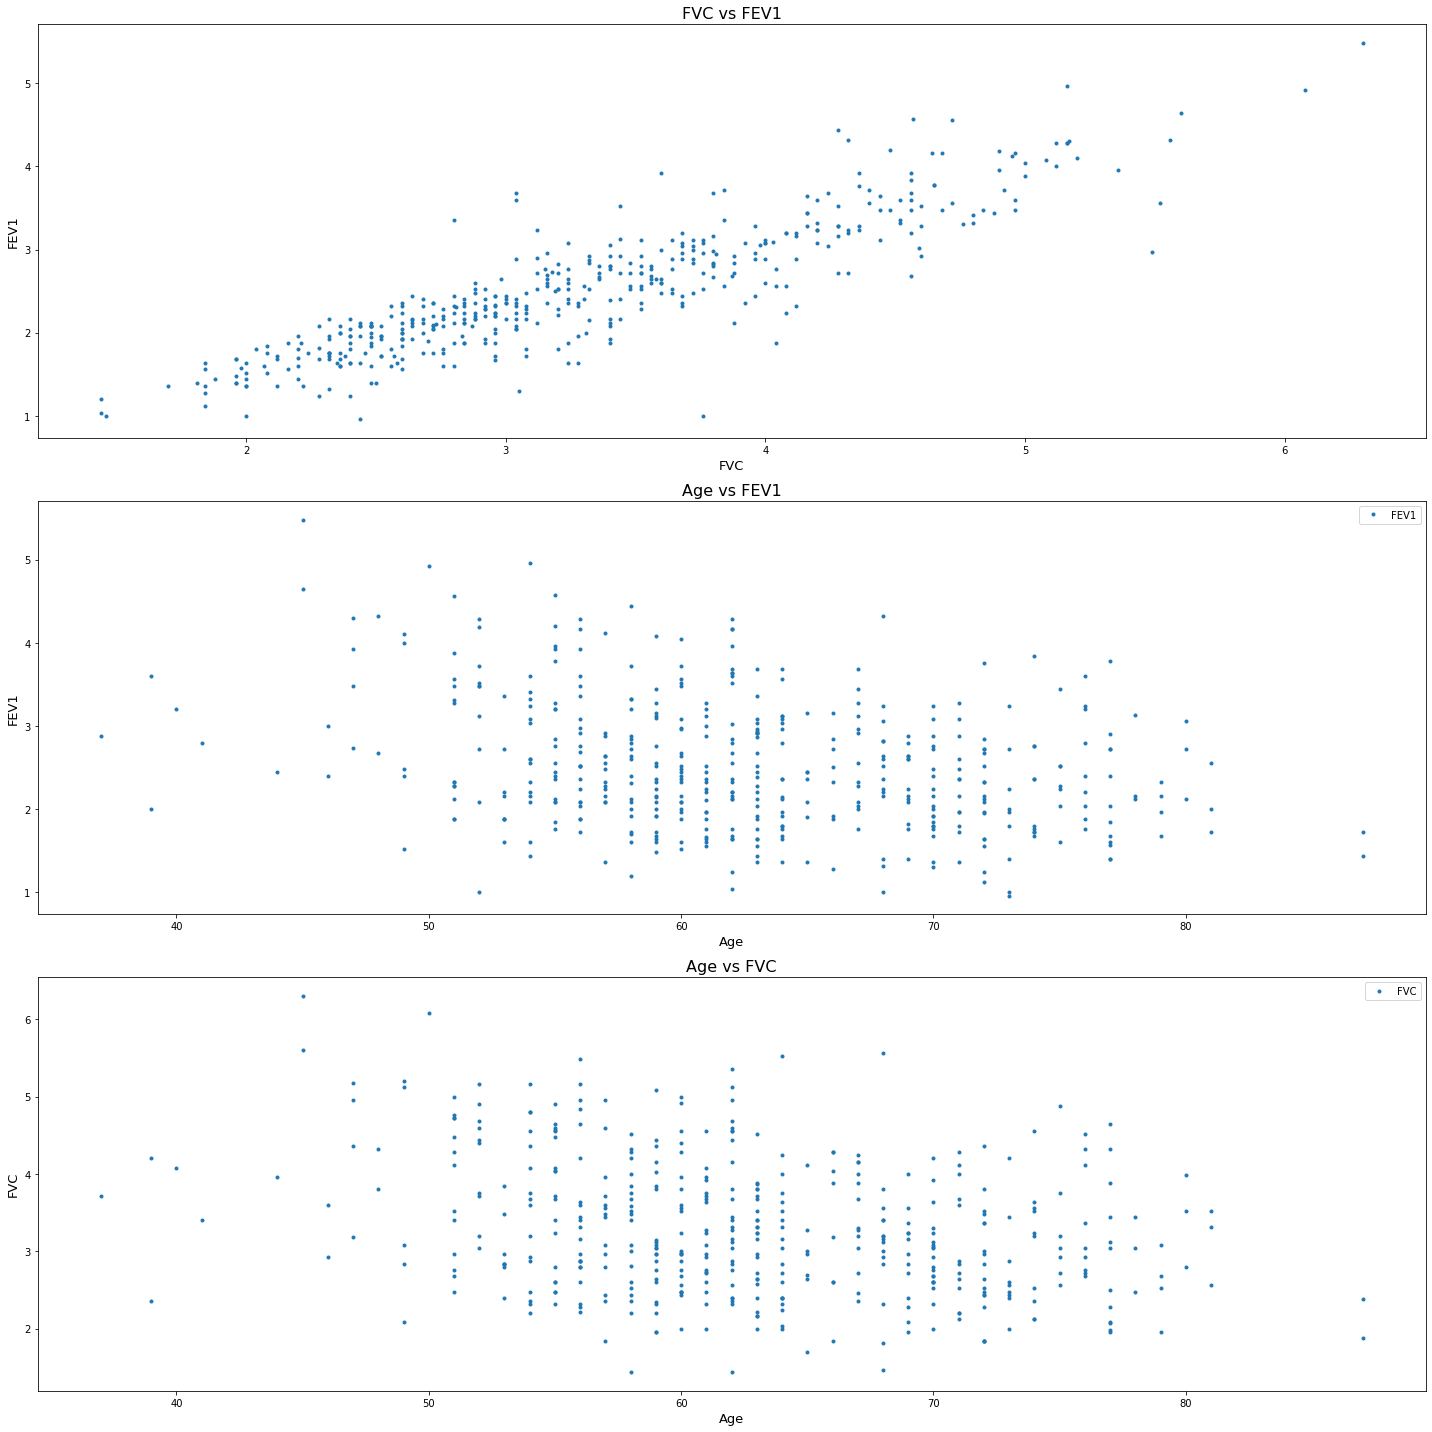

In [12]:
# Scatter plot for FVC, FEV1, Age columns

fig, axes = plt.subplots(3,1,figsize=(20,20))
axes[0].plot(df.FVC, df.FEV1, linestyle='none', marker='.')

axes[0].set_xlabel('FVC', fontsize=13)
axes[0].set_ylabel('FEV1', fontsize=13)
axes[0].set_title('FVC vs FEV1', fontsize=16)

axes[1].plot(df.Age, df.FEV1, linestyle='none', marker='.', label='FEV1')

axes[1].set_xlabel('Age', fontsize=13)
axes[1].set_ylabel('FEV1', fontsize=13)
axes[1].legend()
axes[1].set_title('Age vs FEV1', fontsize=16)
axes[2].plot(df.Age, df.FVC, linestyle='none', marker='.', label='FVC')
axes[2].set_xlabel('Age', fontsize=13)
axes[2].set_ylabel('FVC', fontsize=13)
axes[2].legend()
axes[2].set_title('Age vs FVC', fontsize=16)
plt.tight_layout()

In [13]:
# Correlation coefficients for FVC and FEV1
c1 = np.corrcoef(df.FVC, df.FEV1)[0,1]

# Correlation coefficients for Age and FVC
c2 = np.corrcoef(df.Age, df.FVC)[0,1]

# Correlation coefficients for Age and FEV1
c3 = np.corrcoef(df.Age, df.FEV1)[0,1]

print(c1, c2, c3)

0.8875452733829 -0.299429919660491 -0.3096166273079891


In [14]:
df.groupby('Death_1yr').size()

Death_1yr
0    385
1     69
dtype: int64

In [21]:
mask = np.random.random(df.shape[0]) < 0.7
# df[mask]    # train set ~70%
# df[~mask]   # test set ~30%

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [24]:
model = LogisticRegression()

model.fit(df[mask].drop('Death_1yr', axis=1), df[mask]['Death_1yr'])
pred = model.predict(df[~mask].drop('Death_1yr', axis=1))
prob = model.predict_proba(df[~mask].drop('Death_1yr', axis=1))

C:\Users\Justina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [25]:
print('Log-loss = {0:.02f}'.format(
    log_loss(df[~mask]['Death_1yr'], prob)))
print('Hit rate = {0:.02%}'.format(
    (df[~mask]['Death_1yr'] == pred).mean()))

Log-loss = 0.44
Hit rate = 83.05%


In [35]:
print("group by Death_1yr:", df.groupby(["Death_1yr"]).count())

group by Death_1yr:            Diagnosis  FVC  FEV1  Performance  Pain  Haemoptysis  Dyspnoea  \
Death_1yr                                                                   
0                385  385   385          385   385          385       385   
1                 69   69    69           69    69           69        69   

           Cough  Weakness  Tumor_Size  Diabetes_Mellitus  MI_6mo  PAD  \
Death_1yr                                                                
0            385       385         385                385     385  385   
1             69        69          69                 69      69   69   

           Smoking  Asthma  Age  
Death_1yr                        
0              385     385  385  
1               69      69   69  


In [38]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import metrics


In [51]:
mask = np.random.random(df.shape[0]) < 0.7
# df[mask]    # train set ~70%
# df[~mask]   # test set ~30%

In [69]:
X = df.drop('Death_1yr', axis='columns')
y = df['Death_1yr']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [70]:
Logistic_model = LogisticRegression()

Logistic_model.fit(X_train, y_train)

C:\Users\Justina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_predict= model.predict(X_test)
print("Y predict/hat", y_predict)

Y predict/hat [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [76]:
column_label = list(X_train.columns) # To label all the coefficient
model_Coeff = pd.DataFrame(model.coef_, columns = column_label)
model_Coeff['intercept'] = model.intercept_
print("Coefficient Values Of The Surface Are: ", model_Coeff)

Coefficient Values Of The Surface Are:     Diagnosis       FVC      FEV1  Performance      Pain  Haemoptysis  \
0   0.383516 -0.272423 -0.285203     0.132345  0.230315     0.609337   

   Dyspnoea     Cough  Weakness  Tumor_Size  Diabetes_Mellitus    MI_6mo  \
0  0.537988  0.454924  0.231387    0.616832           0.592025 -0.294084   

        PAD   Smoking    Asthma       Age  intercept  
0  0.415067  0.697766 -0.193555 -0.042908   -1.06165  


In [78]:
logmodel_score = model.score(X_test, y_test)
print("This is how our Model Scored:\n\n", logmodel_score)

This is how our Model Scored:

 0.8394160583941606


In [81]:
print("negative positive")
cm=metrics.confusion_matrix(y_test, y_predict)
print(cm)

negative positive
[[114   2]
 [ 20   1]]


In [91]:
cm[0][0]

114

In [99]:
recall_l=cm[0][0]/(cm[0][0]+cm[0][1])
print(recall_l*100, " %")

98.27586206896551  %


In [101]:
recall_d=cm[1][1]/(cm[1][0]+cm[1][1])
print(recall_d*100, " %")

4.761904761904762  %


In [103]:
precision_l=cm[0][0]/(cm[0][0]+cm[1][0])
print(precision_l*100, " %")

85.07462686567165  %


In [104]:
precision_d=cm[1][1]/(cm[0][1]+cm[1][1])
print(precision_d*100, " %")

33.33333333333333  %


In [126]:

lived2 = lived.sample(60)
died2 = died.sample(60)
sampledata=pd.concat([lived2,died2], axis = 0)
#print(sampledata)
sdf = pd.DataFrame(sampledata)

In [127]:
mask = np.random.random(sdf.shape[0]) < 0.7

In [138]:

Logistic_model = LogisticRegression()

X = sdf.drop('Death_1yr', axis='columns')
y = sdf['Death_1yr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Logistic_model.fit(X_train, y_train)


C:\Users\Justina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
logmodel_score = model.score(X_test, y_test)
print("This is how our Model Scored:\n\n", logmodel_score)

This is how our Model Scored:

 0.8888888888888888


In [141]:
y_predict= model.predict(X_test)
print("Y predict/hat", y_predict)

Y predict/hat [1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [142]:
print("negative positive")
cm=metrics.confusion_matrix(y_test, y_predict)
print(cm)

negative positive
[[18  2]
 [ 2 14]]


In [143]:
recall_l=cm[0][0]/(cm[0][0]+cm[0][1])
print(recall_l*100, " %")

90.0  %


In [144]:
recall_d=cm[1][1]/(cm[1][0]+cm[1][1])
print(recall_d*100, " %")

87.5  %


In [145]:
precision_l=cm[0][0]/(cm[0][0]+cm[1][0])
print(precision_l*100, " %")

90.0  %


In [146]:
precision_d=cm[1][1]/(cm[0][1]+cm[1][1])
print(precision_d*100, " %")

87.5  %
